# **ÁRBOL DE CLASIFICACIÓN**

In [ ]:
#importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np

# Visualizacion del arbol
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Regresion Logistica
from sklearn.tree import DecisionTreeClassifier #
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Cargar el dataset
df = pd.read_excel('agricultura.xlsx')

In [ ]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   N              2200 non-null   int64 
 1   P              2200 non-null   int64 
 2   K              2200 non-null   int64 
 3   temperatura    2200 non-null   int64 
 4   humedad        2200 non-null   int64 
 5   ph             2200 non-null   int64 
 6   precipitacion  2200 non-null   int64 
 7   etiqueta       2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


In [ ]:
#Obtener informacion del dataset - Datos
df

,N,P,K,temperatura,humedad,ph,precipitacion,etiqueta
0,90,42,43,2087974371,8200274423,6502985292000000,2029355362,arroz
1,85,58,41,2177046169,8031964408,7038096361,2266555374,arroz
2,60,55,44,2300445915,823207629,7840207144,2639642476,arroz
3,74,35,40,2649109635,8015836264,6980400905,2428640342,arroz
4,78,42,42,2013017482,8160487287,7628472891,2627173405,arroz
...,...,...,...,...,...,...,...,...
2195,107,34,32,2677463708,664132686,678006386,1777745075,cafe
2196,99,15,27,2741711238,5663636248,6086922359,12792461000000000,cafe
2197,118,33,30,2413179691,6722512329,6362607851,17332283859999900,cafe
2198,117,32,34,262724184,5212739421,6758792552,1271752928,cafe


# **VISUALIZACIÓN DE DATOS**

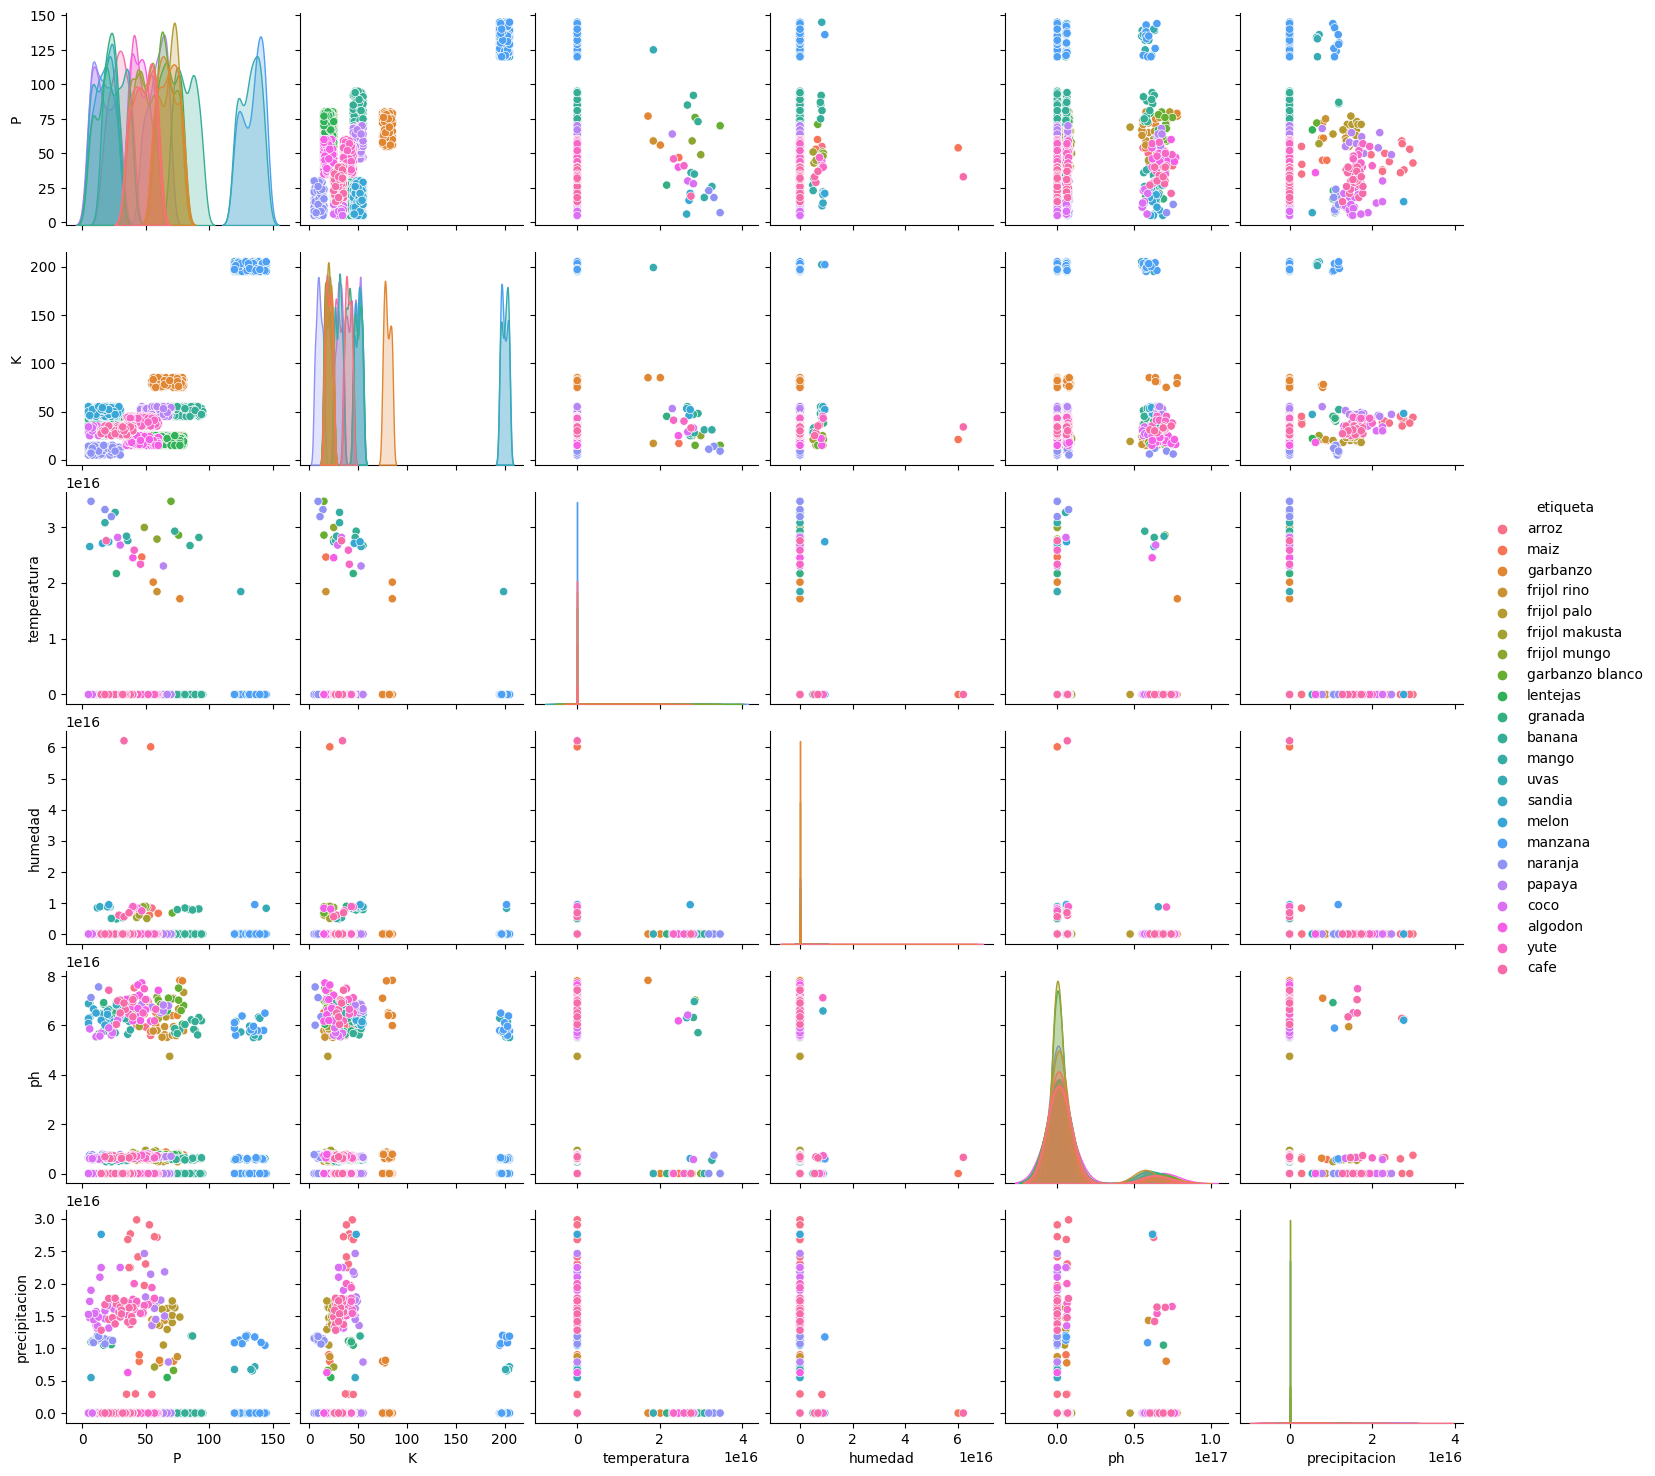

In [ ]:
#Visualizacion de datos
sns.pairplot(df.iloc[:,1:],hue='etiqueta')

# **ENTRENAMIENTO DEL MODELO**

In [ ]:
# Mezclar los datos
df = shuffle(df, random_state=2)

In [ ]:
df

,N,P,K,temperatura,humedad,ph,precipitacion,etiqueta
2121,83,21,28,255674832,6049244602,7466900682999990,1902257843,cafe
960,1,27,36,2398598756,9334236582,5684995235,104991282,granada
952,23,5,44,2120725375,9426304717,716300467,1075660804,granada
1958,116,52,19,2294276687,7537170612,6114525877,6708022574,algodon
681,6,37,17,2808657178,8035005927,6760694227999990,3814476781,frijol mungo
...,...,...,...,...,...,...,...,...
1071,105,88,54,2578749808,8451194224,6020445317,1142005455,banana
433,27,71,23,2345379018,4648714759,710959773,15087122019999900,frijol palo
674,23,39,22,2925649321,8197952224,686483915,4202483277,frijol mungo
1099,117,81,53,2950704598,7820585613,5507641777999990,9812565829,banana


In [ ]:
# Seleccionar las variables relevantes para la regresión
variables = ['N', 'P', 'K', 'temperatura', 'humedad', 'ph', 'precipitacion']

X = df[variables]
y = df['etiqueta']

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Crear el modelo de Clasificacion
model = DecisionTreeClassifier(random_state=13)

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# **EVALUACIÓN DEL MODELO**

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 0.96


In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0 17  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

# **VISUALIZACIÓN DEL ÁRBOL DE CLASIFICACIÓN**

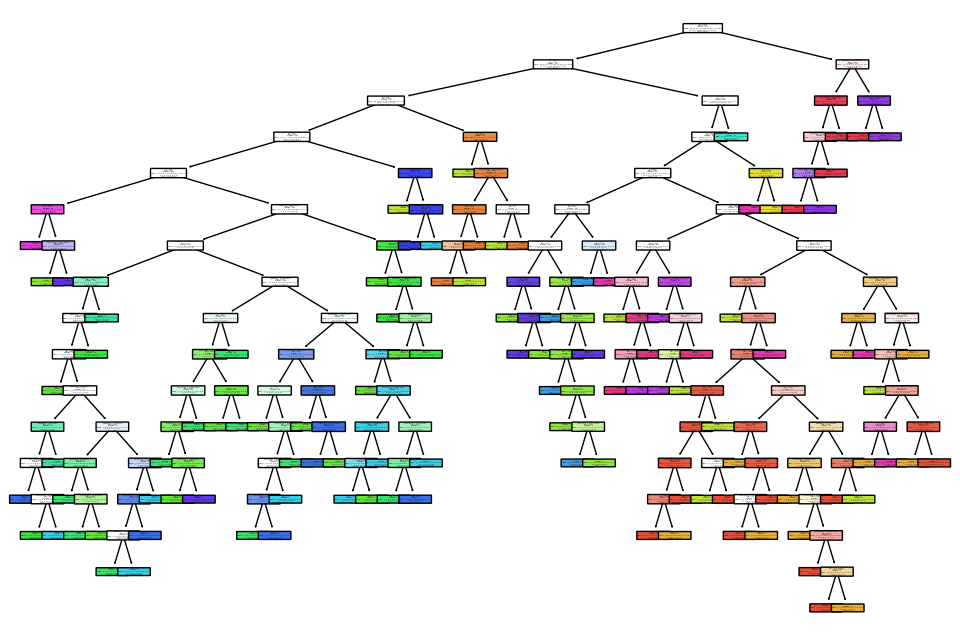

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=df.columns[:-1], class_names=model.classes_, filled=True, rounded=True)
plt.show()

# **PREDICCIÓN FUTURA**

In [ ]:
N = 13
P = 5
K = 8
Temperatura = 2385340379
humedad =9010522549
ph = 7474710503
precipitacion = 103923226

In [ ]:
# Valores futuros
new_sample = np.array([[N, P, K, Temperatura, humedad, ph, precipitacion]])

# Realiza predicciones en las nuevas muestras utilizando el modelo de árbol de decisión
y_pred_new = model.predict(new_sample)

# y_pred_new contiene las etiquetas de clase predichas para las nuevas muestras
print(f"La Clasificacion de etiqueta es: {y_pred_new[0]}")

La Clasificacion de etiqueta es: naranja


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**GUARDAR EL MODELO ENTRENADO**

In [ ]:
import pickle

# Guardar el modelo en un archivo
with open('regresion_arbol.pkl', 'wb') as file:
    pickle.dump(model, file)